In [1]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
#loading the dataset to a pandas Dataframe
pwd = os.getcwd()
filepath = os.path.join("Tabel Tembak1.csv")
tabel_dataset = pd.read_csv(filepath)
tabel_dataset.head()

,Isian,Jarak,Sudut Elevasi,Waktu Lintas
0,0,100,83.35,13.5
1,0,150,80.13,13.4
2,0,200,76.47,13.2
3,0,250,73.07,13.0
4,0,300,69.04,12.7


In [3]:
tabel_dataset.shape

(225, 4)

In [4]:
# checking for missing values
tabel_dataset.isnull().sum()

Isian            0
Jarak            0
Sudut Elevasi    0
Waktu Lintas     0
dtype: int64

In [5]:
tabel_dataset.describe()

,Isian,Jarak,Sudut Elevasi,Waktu Lintas
count,225.000000,225.000000,225.00000,225.000000
mean,3.800000,2528.133333,66.59800,31.594222
std,2.546005,2010.226828,9.94025,14.751205
min,0.000000,100.000000,45.00000,9.600000
25%,2.000000,625.000000,60.01000,13.400000
50%,3.000000,2200.000000,66.80000,33.200000
75%,6.000000,4400.000000,74.32000,45.000000
max,8.000000,6500.000000,83.35000,53.200000


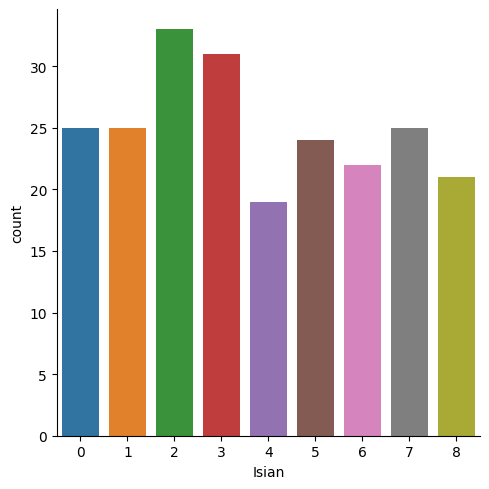

In [6]:
# number of values for each quality
sns.catplot(x='Isian', data = tabel_dataset, kind = 'count')

In [17]:
X = tabel_dataset.drop('Sudut Elevasi', axis=1)

In [18]:
Y = tabel_dataset['Sudut Elevasi']

# Train and Test Split data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(Y.shape, Y_train.shape, Y_test.shape)

(225,) (180,) (45,)


In [20]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                'subsample'    : [0.9, 0.5, 0.2, 0.1],
                'n_estimators' : [100,500,1000, 1500],
                'max_depth'    : [4,6,8,10]
            }

In [21]:
reg = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=reg, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, Y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

# Model Evaluation

In [22]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print('Accuracy score of the test data: ', grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=1500,
                          subsample=0.5)

 The best score across ALL searched params:
 0.8999251715328846
Accuracy score of the test data:  0.8999251715328846

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.5}


In [25]:
input_data = (4,1900,39.1)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instane
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = grid_GBR.predict(input_data_reshaped)
print(prediction)

[73.39880108]


c:\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [24]:
# 650-2550
v = 67
j = 220
v2 = pow(v,2)
f = j * 10 / v2
if (f > 1):
    f = 1
rad = math.asin(f)
degrees = 90 - (((180 / math.pi) * rad) / 2)
print("degrees: ", degrees)

der = degrees / (180 / math.pi)
a = 67 * math.sin(der)
ymax = 2 * a / 10
print("waktu: ", ymax)

degrees:  75.32685397930521
waktu:  12.96298017779921
